In [6]:
import econpizza as ep
import matplotlib.pyplot as plt

In [7]:
model = ep.load('rbc.yaml',
                raise_errors=True,
                verbose=True)
_ = model.solve_stst()
model.steady_state
shk = ('e_a', 0.01 )

x1, flag = model.find_path(shock=shk)

(load:) Loading cached model.
(solve_stst:) Steady state already known.
    Iteration   1 | max error 1.40e-02 | lapsed 0.0021s
    Iteration   2 | max error 1.22e-17 | lapsed 0.0035s
(find_path:) Stacking done (0.056s). The solution converged.


/Users/carlosortiz/econ_pizza_macro/venv/lib/python3.11/site-packages/econpizza/parser/__init__.py:262: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  init_wf = jnp.array(None)
/Users/carlosortiz/econ_pizza_macro/venv/lib/python3.11/site-packages/econpizza/solvers/stacking.py:83: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  dist0 = jnp.array(init_dist) if init_dist is not None else jnp.array(


In [8]:
model.parameters

['phi',
 'sigma',
 'alpha',
 'ybar',
 'kbar',
 'cbar',
 'lbar',
 'rbar',
 'abar',
 'beta',
 'rho',
 'delta',
 'psi']

In [11]:
model2 = ep.load('rbc.yaml',
                 raise_errors=True,
                 verbose=True)
model2['steady_state']['fixed_values']['sigma'] = 2
_ = model2.solve_stst()
model2.steady_state
shk = ('e_a', 0.01 )

x2, flag = model2.find_path(shock=shk)

(load:) Loading cached model.
    Iteration   1 | max. error 1.00e+00 | lapsed 0.0010
(solve_stst:) Steady state found (0.028644s). The solution converged.


/Users/carlosortiz/econ_pizza_macro/venv/lib/python3.11/site-packages/econpizza/parser/__init__.py:262: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  init_wf = jnp.array(None)
/Users/carlosortiz/econ_pizza_macro/venv/lib/python3.11/site-packages/econpizza/solvers/stacking.py:83: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  dist0 = jnp.array(init_dist) if init_dist is not None else jnp.array(


    Iteration   1 | max error 1.27e-02 | lapsed 0.2182s
    Iteration   2 | max error 2.54e-17 | lapsed 0.2195s
(find_path:) Stacking done (0.223s). The solution converged.


In [12]:
model3 = ep.load('rbc.yaml', raise_errors=True, verbose=True)
model3['steady_state']['fixed_values']['phi'] = 2
_ = model3.solve_stst()
model3.steady_state
shk = ('e_a', 0.01)

x3, flag = model3.find_path(shock=shk)

(load:) Loading cached model.
    Iteration   1 | max. error 1.00e+00 | lapsed 0.0002
(solve_stst:) Steady state found (0.01503s). The solution converged.


/Users/carlosortiz/econ_pizza_macro/venv/lib/python3.11/site-packages/econpizza/parser/__init__.py:262: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  init_wf = jnp.array(None)
/Users/carlosortiz/econ_pizza_macro/venv/lib/python3.11/site-packages/econpizza/solvers/stacking.py:83: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  dist0 = jnp.array(init_dist) if init_dist is not None else jnp.array(


    Iteration   1 | max error 1.25e-02 | lapsed 0.1907s
    Iteration   2 | max error 1.90e-17 | lapsed 0.1922s
(find_path:) Stacking done (0.195s). The solution converged.


In [13]:
x = [x1, x2, x3]

In [22]:
model3

{'variables': ['a', 'c', 'k', 'l', 'r', 'w', 'y'],
 'shocks': ['e_a'],
 'parameters': ['phi',
  'sigma',
  'alpha',
  'ybar',
  'kbar',
  'cbar',
  'lbar',
  'rbar',
  'abar',
  'beta',
  'rho',
  'delta',
  'psi'],
 'definitions': 'from jax.numpy import log, maximum\n',
 'equations': ['w = phi * l + sigma * c',
  'w = y - l',
  'r = y - k',
  'y = a + alpha * k + (1-alpha) * l',
  'k = (ybar / kbar) * y - (cbar / kbar) * c + (1 - delta) * kLag',
  'cPrime = c + ((beta / sigma) * rbar) * rPrime',
  'a = rho * aLag + e_a'],
 'steady_state': {'fixed_values': {'phi': 2,
   'sigma': 1,
   'alpha': 0.33,
   'beta': 0.98,
   'rho': 0.9,
   'delta': 0.025,
   'abar': 1,
   'psi': '((1 - beta * (1 - delta)) / (beta * alpha * abar)) ** (1 / (alpha - 1))',
   'lbar': '((((1 - alpha) * abar * psi ** alpha) / (abar * psi ** alpha - delta * psi) ** sigma)) ** (1 / (psi + sigma))',
   'rbar': '(1 / beta) - (1 - delta)',
   'kbar': 'psi * lbar',
   'ybar': 'abar * kbar ** alpha * lbar ** (1 - alpha)'

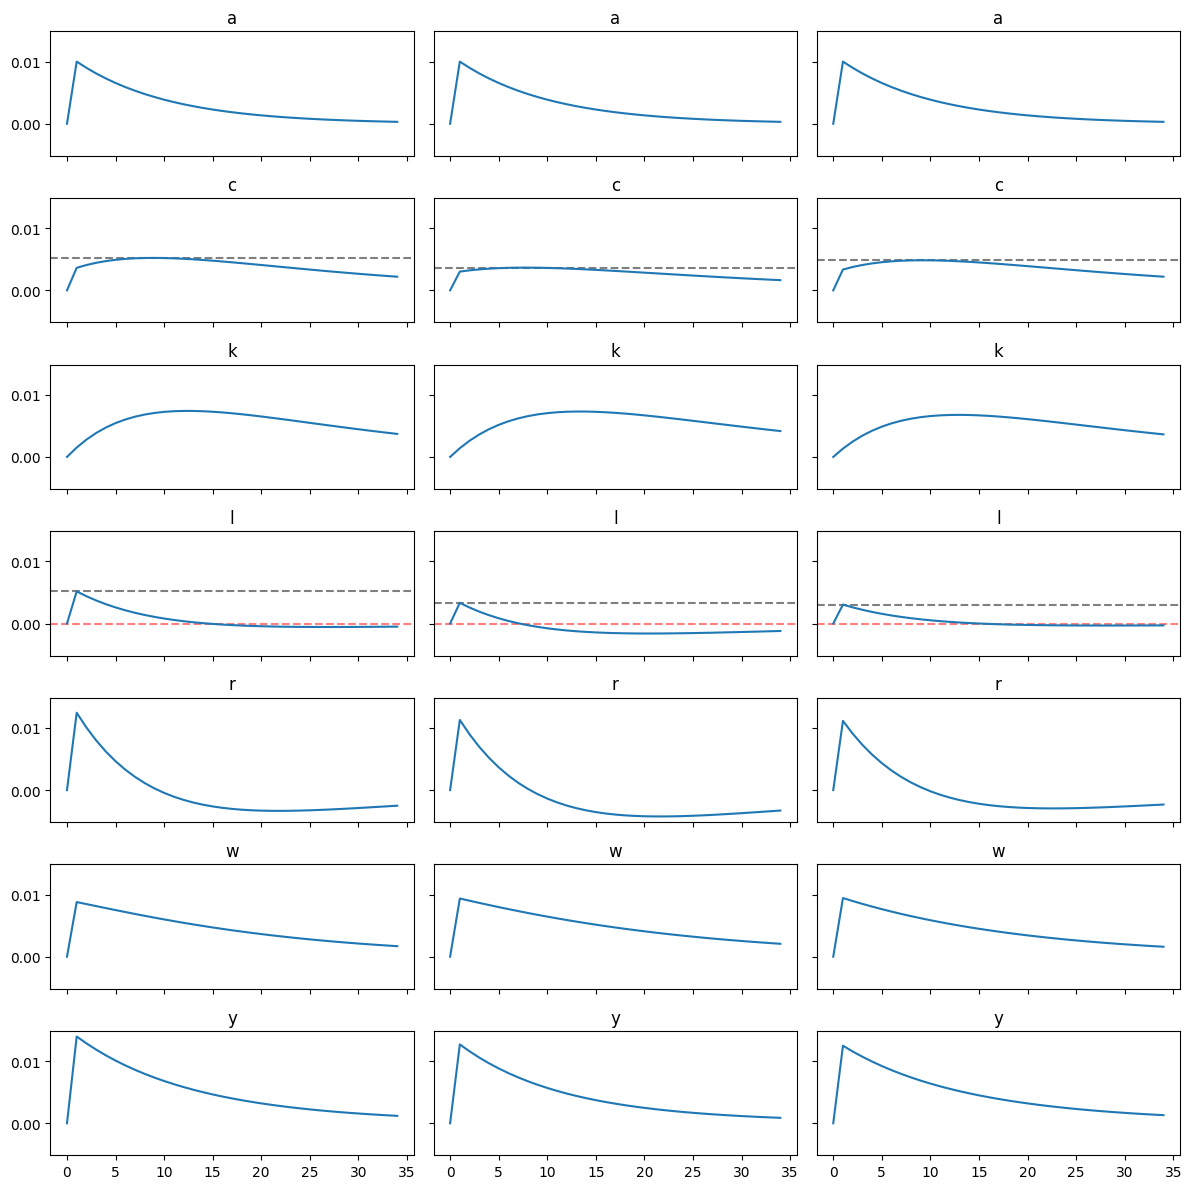

In [23]:
fig, axes = plt.subplots(7,
                         len(x),
                         sharex=True,
                         sharey=True,
                          figsize=(12, 12))

vars = ['a', 'c', 'k', 'l', 'r', 'w', 'y']

for i, ax in enumerate(axes):
  var = vars[i]
  for idx, a in enumerate(ax):
    m = x[idx]
    if var == 'c':
      a.axhline(max(m[:35, i]),
                color='k',
                ls='--',
                alpha=0.5)
    if var == 'l':
      a.axhline(max(m[:35, i]), color='k',
                ls='--',
                alpha=0.5)
      a.axhline(0, color='r', ls='--', alpha=0.5)
    a.plot(m[:35, i])
    a.set_title(var)

fig.tight_layout()